In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('train_X: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))




Using TensorFlow backend.


train_X: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [2]:
def show(image, title):
    index = 1
    plt.figure(figsize=(10,5))

    for x in zip(image, title):
        image = x[0]
        title = x[1]
        plt.subplot(2, 5, index)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(x[1], fontsize = 9)
        index += 1



In [3]:
def create_single_collage(idx_list):
    row1 = np.concatenate((train_X[idx_list[0]], train_X[idx_list[1]]), axis=1)
    row2 = np.concatenate((train_X[idx_list[2]], train_X[idx_list[3]]), axis=1)
    collaged_X = np.concatenate((row1, row2), axis=0)
    collaged_y = np.array([train_y[idx_list[0]],train_y[idx_list[1]],train_y[idx_list[2]],train_y[idx_list[3]]])
    return collaged_X, collaged_y

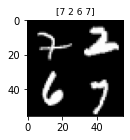

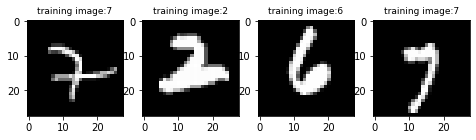

In [28]:
image = []
title = []
idx = []
for i in range(4):
    r = random.randint(1, len(train_X))
    image.append(train_X[r])
    idx.append(r)
    title.append('training image:' + str(train_y[r]))
(X,y) = create_single_collage(idx)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

show(image, title)

In [5]:
def generate_random_idx_list(l):
    idx_list = random.sample(range(len(train_X)), k=l)
    return np.array(idx_list)

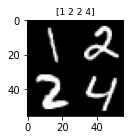

In [6]:
idx_list = generate_random_idx_list(4)
(X,y) = create_single_collage(idx_list)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

(8000, 56, 56) (8000, 4)
0 3 3 [0, 1, 3]
0 3 1 [1]
3 2 1 [1]
0 1 1 [3]


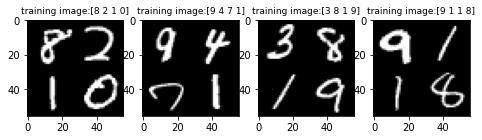

In [8]:
dataset_len =8000
collaged_X = []
collaged_y = []
argmax_y = []
argmin_y = []
even_count = []
even_pos_list = []
for i in range(dataset_len):
    idx_list = generate_random_idx_list(4)
    (X,y) = create_single_collage(idx_list)
    collaged_X.append(X)
    collaged_y.append(y)
    even_num = 0
    even_pos = []
    for h in range(len(y)):
        digit = y[h]
        if digit%2==0:
            even_num +=1
            even_pos.append(h)
    largest_idx = np.argmax(y)
    smallest_idx = np.argmin(y)
#     print(largest_idx)
    argmax_y.append(largest_idx)
    argmin_y.append(smallest_idx)
    even_count.append(even_num)
    even_pos_list.append(even_pos)
collaged_X = np.array(collaged_X)
collaged_y = np.array(collaged_y)
argmax_y = np.array(argmax_y)
argmin_y = np.array(argmin_y)
print(collaged_X.shape, collaged_y.shape)
image = []
title = []
for i in range(4):
    r = random.randint(1, len(collaged_X))
    image.append(collaged_X[r])
    title.append('training image:' + str(collaged_y[r]))
    print(argmax_y[r], argmin_y[r], even_count[r], even_pos_list[r])

show(image, title)

(4000,)
(8000,)
The smallest number is on the left half. 0
The largest number is on the left half. 0
There are 1 even number(s) in the image. 1
The smallest number is on the left half. 1


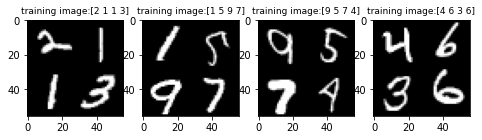

In [23]:
modified_idx_list = random.sample(range(len(collaged_X)), k=len(collaged_X)//2)
label = np.ones(len(collaged_X)).astype(int)
label[modified_idx_list] = 0
print(np.where(label==0)[0].shape)
print(label.shape)
text_list = []
row_pos_text = {0:'upper', 1:'upper', 2:'bottom', 3:'bottom'}
col_pos_text = {0:'left', 1:'right', 2:'left', 3:'right'}
pos_text = {0:'upper left', 1:'upper right', 2:'bottom left', 3:'bottom right'}
for i in range(len(collaged_X)):
    info = random.randint(0,2)
    if i%4 == 0:
        # max pos
        if i in modified_idx_list: # modify the position of argmax
            argmax_pos = (argmax_y[i]+random.randint(1,3))%4
        else:
            argmax_pos = argmax_y[i]
        if info == 0:
            text = 'The largest number is on the '+row_pos_text[argmax_pos]+' half.'
        elif info == 1:
            text = 'The largest number is on the '+col_pos_text[argmax_pos]+' half.'
        else:
            text = 'The largest number is at the '+pos_text[argmax_pos]+' corner.'
    elif i%4 == 1:
        # min pos
        if i in modified_idx_list: # modify the position of argmin
            argmin_pos = (argmin_y[i]+random.randint(1,3))%4
        else:
            argmin_pos = argmin_y[i]
        if info == 0:
            text = 'The smallest number is on the '+row_pos_text[argmin_pos]+' half.'
        elif info == 1:
            text = 'The smallest number is on the '+col_pos_text[argmin_pos]+' half.'
        else:
            text = 'The smallest number is at the '+pos_text[argmin_pos]+' corner.'
    elif i%4 == 2:
        # even count
        if i in modified_idx_list:
            even_num = (even_count[i]+random.randint(1,4))%5
            even_pos = []
            for j in range(4):
                if j not in even_pos_list[i]:
                    even_pos.append(j)
        else:
            even_num = even_count[i]
            even_pos = even_pos_list[i]
        if info == 0:
            text = 'There are ' +str(even_num)+ ' even number(s) in the image.'
        if even_num >0 and len(even_pos)>0:
            if info == 1:
                text = 'The first even number is at the '+pos_text[even_pos[0]]+' corner.'
            elif info ==2:
                text = 'There are ' +str(even_num)+ ' even number(s) in the image, and the first even number is at the '+pos_text[even_pos[0]]+' corner.'
        else:
            text = 'There is no even number in the image.'
    elif i%4 == 3:
        # odd count
        if i in modified_idx_list:
            odd_num = ((4-even_count[i])+random.randint(1,4))%5
            odd_pos = even_pos_list[i]
            
        else:
            odd_num = 4-even_count[i]
            odd_pos = []
            for j in range(4):
                if j not in even_pos_list[i]:
                    odd_pos.append(j)
        if info == 0:
            text = 'There are ' +str(odd_num)+ ' odd number(s) in the image.'
        if odd_num>0 and len(odd_pos)>0:
            if info == 1:
                text = 'The first odd number is at the '+pos_text[odd_pos[0]]+' corner.'
            elif info ==2:
                text = 'There are ' +str(odd_num)+ ' odd number(s) in the image, and the first odd number is at the '+pos_text[odd_pos[0]]+' corner.'
        else:
            text = 'There is no odd number in the image.'
    else:
        print('error!!!')
    text_list.append(text)
image = []
title = []
for i in range(4):
    r = random.randint(1, len(collaged_X))
    image.append(collaged_X[r])
    title.append('training image:' + str(collaged_y[r]))
    print(text_list[r],label[r])

show(image, title)

In [24]:
import pickle

In [25]:
# collaged_MNIST_dataset = {'image':collaged_X, 'text':text_int, 'label':label}
# pickle.dump(collaged_MNIST_dataset, open('collaged_MNIST.p','wb'))

collaged_MNIST_dataset = {'image':collaged_X, 'text':text_list, 'label':label}
pickle.dump(collaged_MNIST_dataset, open('collaged_MNIST_multitasks.p','wb'))

In [26]:
# dataset = pickle.load(open('collaged_MNIST.p','rb'))
# for key in dataset:
#     print(dataset[key][:10])

    
dataset = pickle.load(open('collaged_MNIST_multitasks.p','rb'))
for key in dataset:
    print(dataset[key][:10])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
['The largest number is on the right half.', 'The smallest number is on the upper half.', 'The first even number is at the upper left corner.', 'There are 4 odd number(s) in the image.', 'The largest number is at the upper lef